# Full Solution-4

In [7]:
# Note: The data below is the one you retrieved in previous part and
#it is used here to run the rest of the analysis.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


risk_free = pd.read_csv('risk_free.csv')
risk_free = risk_free.set_index('Unnamed: 0')
risk_free.index.names = ['Date']
returns =  pd.read_csv('returns.csv')
returns = returns.set_index('timestamp')
df_merged = pd.read_csv('df_merged.csv')
df_merged = df_merged.set_index('timestamp')

y = df_merged['excess_return_TWTR']
X_TWTR = df_merged.iloc[:, 2:]

X_TWTR = sm.add_constant(X_TWTR, prepend=False)
APT_TWTR = sm.OLS(y, X_TWTR)
APT_results_TWTR = APT_TWTR.fit()

y = df_merged['excess_return_FB']
X_FB = df_merged.iloc[:, 2:]

X_FB = sm.add_constant(X_FB, prepend=False)
APT_FB = sm.OLS(y,X_FB)
APT_results_FB = APT_FB.fit()

In [8]:
def SML(risk_free,ret,betas):
    asset_ret = [risk_free + (rm - risk_free) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.plot(1, ret, "ro")

In [9]:
ret_cov = returns.iloc[:, :2].cov()
rm = returns['SPY'].mean()
risk_free = risk_free.mean()
betas = [APT_results_TWTR.params[0], APT_results_FB.params[0]]

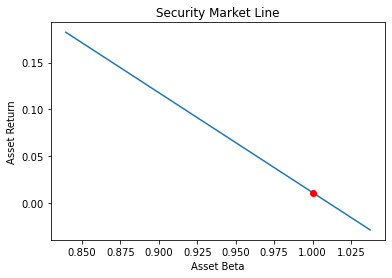

In [10]:
SML(risk_free, rm, betas)

Well, contrary to the theory, the slope of SML is negative implying that the more systematic risk you have, the lower the expected return is. This sounds awkward, but it happens from time to time.